In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reading the Data

In [2]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.shape

(150, 5)

In [8]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
x=df.drop('species',axis=1)
y=df.species

# Data Visualization

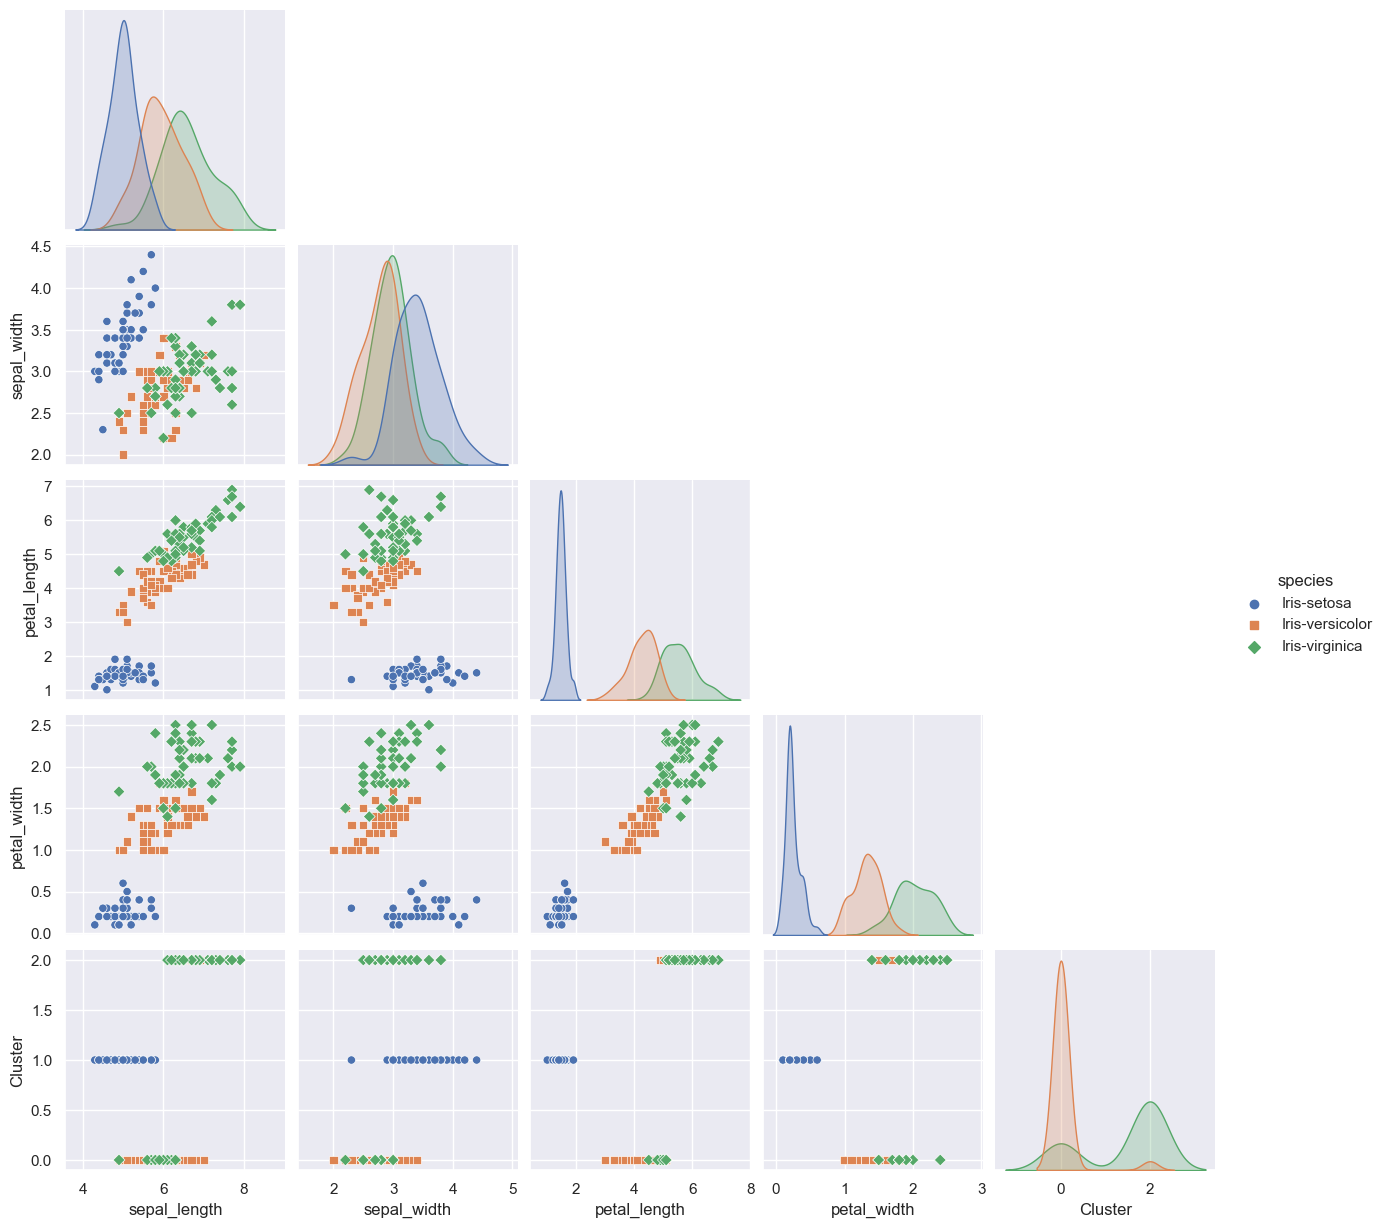

In [28]:

sns.set(style='darkgrid')
sns.pairplot(df,hue='species',markers=["o","s","D"],diag_kind="kde",corner=True)
plt.show()

In [17]:
#KNN Classifier

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10)
KNN_Classifier = KNeighborsClassifier(n_neighbors=3)
KNN_Classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
import warnings
warnings.filterwarnings("ignore")
X_newIris = np.array([[5.0, 2.9, 1.0, 0.2]])
predictNew = KNN_Classifier.predict(X_newIris)
print(predictNew)

['Iris-setosa']


In [13]:
print(KNN_Classifier.score(X_test, y_test))

0.9736842105263158


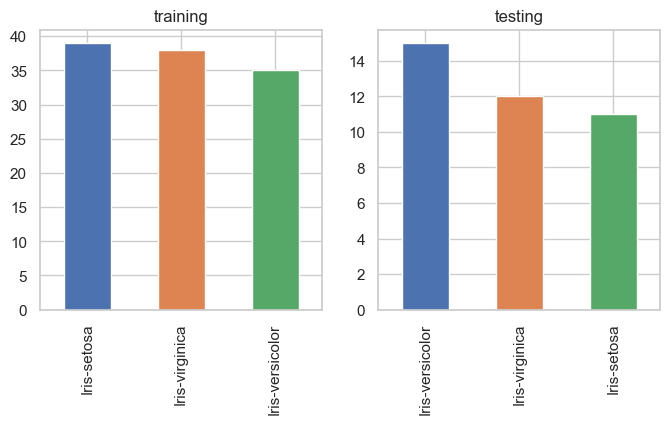

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')
plt.show()

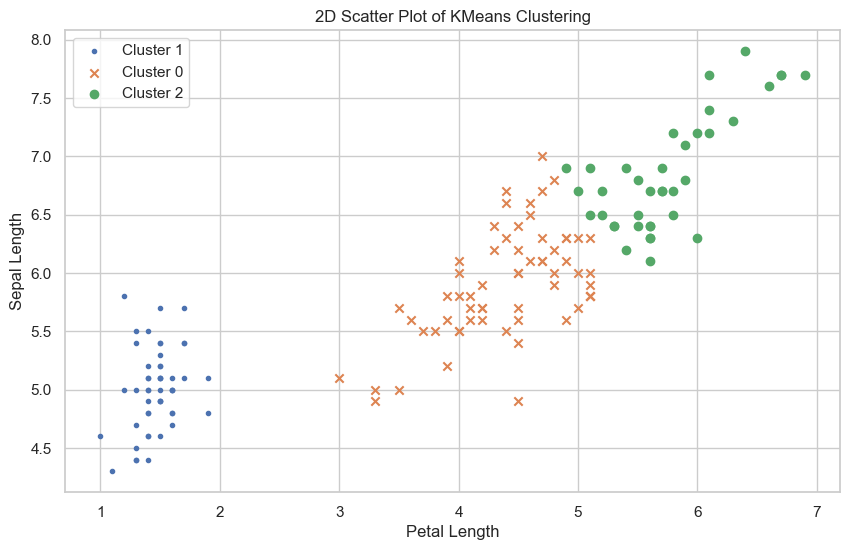

In [15]:
#Kmeans Data Visualization

kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Add cluster labels to the dataset
df = df.copy()
df['Cluster'] = y_kmeans
marker_styles = [".", "x", "o"]

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))  # Set figure size if needed
for cluster, marker in zip(df['Cluster'].unique(), marker_styles):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['petal_length'], subset['sepal_length'], label=f'Cluster {cluster}', marker=marker)

plt.title("2D Scatter Plot of KMeans Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()
plt.show()

In [16]:
#Random Forest Algorithm

method = RandomForestClassifier()

# Cross-validation
accuracy = cross_val_score(method, x, y, cv=10, scoring='accuracy')
precision = cross_val_score(method, x, y, cv=10, scoring='precision_weighted')
recall = cross_val_score(method, x, y, cv=10, scoring='recall_weighted')
f1 = cross_val_score(method, x, y, cv=10, scoring='f1_weighted')

score = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})
score

,Accuracy,Precision,Recall,F1-Score
0,1.000000,1.000000,1.000000,1.000000
1,0.933333,0.944444,0.933333,0.932660
2,1.000000,1.000000,1.000000,1.000000
3,0.933333,0.944444,0.933333,0.932660
4,0.933333,0.944444,0.933333,0.932660
5,0.933333,0.944444,0.933333,0.932660
6,0.866667,0.866667,0.866667,0.866667
7,1.000000,1.000000,0.933333,0.932660
8,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000
